In [655]:
# includes
import pandas as pd
import numpy as np
import math
from random import sample
import matplotlib.pyplot as plt
import statistics
import random

In [3]:
# read in the file
df = pd.read_csv('excelfile2.csv')

In [4]:
df
# column is a slice threw a different cell

,chrom,start,stop,F10A2,F10A3,F10A4,F10A5,F10A6,F10B1,F10B2,...,F9F2,F9F3,F9F4,F9F5,F9F6,F9G1,F9G2,F9G3,F9G4,F9G5
0,chr1,0,30000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr1,30000,60000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr1,60000,90000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr1,90000,120000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr1,120000,150000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90872,chr4_random,150000,160594,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90873,chr3_random,0,30000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90874,chr3_random,30000,41899,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90875,chrM,0,16299,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [5]:
# ############################################ Activity 1 ########################################################################
# number of genomic windows (rows)
print("Number of genomic windows:",df.shape[0])

# number of NP's (columns)
print("Number of NP's:",df.shape[1]-3)

# On average, how many windows are present in an NP? (how many 1's) 5482.81
col_sum = df.iloc[:,3:].sum() # get a dict of the columns with the sum

# get the total from the dict
total = 0
for i in range(0, len(col_sum)):
    total += col_sum[i]

print("Avg of windows present in NPs:",total/len(col_sum))

# smalled and biggest number in col sum
print("The smallest number of windows present in NP:",col_sum.min())
print("The largest number of windows present in NP:",col_sum.max())

# On average, what is the number of NPs in which a window is detected? The smallest? The largest? 
row_sum = df.iloc[:,3:].sum(axis=1)

total2 = 0
for i in range(0, len(row_sum)):
    total2 += row_sum[i]

print("Avg of NP's in windows:", total2/len(row_sum))
# smalled and biggest number in row sum
print("The smallest number of NPs present in windows:",row_sum.min())
print("The largest number of NPs present in windows:",row_sum.max())

Number of genomic windows: 90877
Number of NP's: 408
Avg of windows present in NPs: 5482.811274509804
The smallest number of windows present in NP: 31
The largest number of windows present in NP: 21249
Avg of NP's in windows: 24.615546287839607
The smallest number of NPs present in windows: 0
The largest number of NPs present in windows: 408


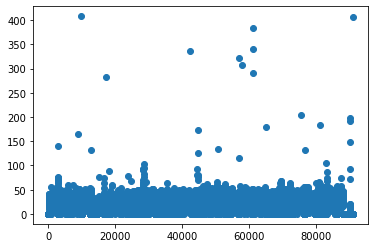

These are the outlier row indexes:  [9857, 17296, 42320, 56851, 57921, 60988, 60989, 60990, 90875]


In [6]:
# ############################################ Tue, Jan 18 Week 2, activity 2 #################################################################
# determine some outliers on the NPs that have windows
# so we make a scatter plot of row_sum
# get the list out of the dict:
tmp = []
tmp2 = []
for i in row_sum.values:
    tmp.append(i)
for i in row_sum.keys():
    tmp2.append(i)

plt.scatter(tmp2, tmp)
plt.show()

# after seeing the graph we can determine that anything above 250 is an outlier, get those rows from tmp2
row_outlier = []
for i in range(0, len(tmp)):
    if tmp[i] > 250:
        row_outlier.append(tmp2[i])

# output
print("These are the outlier row indexes: ", row_outlier)

# delete tmp vars, cleanup
del tmp2
del tmp

In [7]:
# Estimate radial position of each NP
# get the percent for max and divide that into 5 regions to label the entire col_sum list (windows in NP)
p2_percent = (col_sum.max() / df.shape[0]) * 100
print("The percent", p2_percent)

col_sum_divided = []
col_labeled = []
for i in col_sum:
    # get the actual percent in case we need it
    col_sum_divided.append((i / df.shape[0]) * 100)
    # get the label
    if ((i / df.shape[0]) * 100) <= 4.676:
        col_labeled.append(1) # 1 - strongly apical
    elif ((i / df.shape[0]) * 100) > 4.676 and ((i / df.shape[0]) * 100) <= 9.352:
        col_labeled.append(2) # 2 – somewhat apical
    elif ((i / df.shape[0]) * 100) > 9.352 and ((i / df.shape[0]) * 100) <= 14.028:
        col_labeled.append(3) # 3 – neither apical nor equatorial
    elif ((i / df.shape[0]) * 100) > 14.028 and ((i / df.shape[0]) * 100) <= 18.704:
        col_labeled.append(4) # 4 – somewhat equatorial
    elif ((i / df.shape[0]) * 100) > 18.704:
        col_labeled.append(5) # 5 – strongly equatorial

for i in range(5):
    print("column/slices %:",col_sum_divided[i], " , the radial position label for NP: ", col_labeled[i])
# notes
# the columns are slices
# the rows are cells

The percent 23.382153900326816
column/slices %: 6.466982844944265  , the radial position label for NP:  2
column/slices %: 8.325538915237079  , the radial position label for NP:  2
column/slices %: 5.444721986861363  , the radial position label for NP:  2
column/slices %: 4.2155881026002175  , the radial position label for NP:  1
column/slices %: 0.9199247334309012  , the radial position label for NP:  1


In [8]:
# Estimate compaction of each genomic window
p3_percent = (row_sum.max() / (df.shape[1]-3)) * 100
print("The percent", p3_percent)

compaction_perc = []
compaction_labeled = [] # give the window a compaction
for i in row_sum:
    # get the actual percent in case we need it
    compaction_perc.append((i / (df.shape[1] - 3)) * 100)
    # get the label
    if ((i / (df.shape[1] - 3)) * 100) <= 10:
        compaction_labeled.append(1) # least condense
    elif (((i / (df.shape[1] - 3)) * 100) > 10) and (((i / (df.shape[1] - 3)) * 100) <= 20):
        compaction_labeled.append(2)
    elif (((i / (df.shape[1] - 3)) * 100) > 20) and (((i / (df.shape[1] - 3)) * 100) <= 30):
        compaction_labeled.append(3)
    elif (((i / (df.shape[1] - 3)) * 100) > 30) and (((i / (df.shape[1] - 3)) * 100) <= 40):
        compaction_labeled.append(4)
    elif (((i / (df.shape[1] - 3)) * 100) > 40) and (((i / (df.shape[1] - 3)) * 100) <= 50):
        compaction_labeled.append(5)
    elif (((i / (df.shape[1] - 3)) * 100) > 50) and (((i / (df.shape[1] - 3)) * 100) <= 60):
        compaction_labeled.append(6)
    elif (((i / (df.shape[1] - 3)) * 100) > 60) and (((i / (df.shape[1] - 3)) * 100) <= 70):
        compaction_labeled.append(7)
    elif (((i / (df.shape[1] - 3)) * 100) > 70) and (((i / (df.shape[1] - 3)) * 100) <= 80):
        compaction_labeled.append(8)
    elif (((i / (df.shape[1] - 3)) * 100) > 80) and (((i / (df.shape[1] - 3)) * 100) <= 90):
        compaction_labeled.append(9)
    elif (((i / (df.shape[1] - 3)) * 100) > 90):
        compaction_labeled.append(10) # most condense

for i in range(5):
    print("Window compaction %:",compaction_perc[i], " , the window compaction label: ", compaction_labeled[i])


The percent 100.0
Window compaction %: 0.0  , the window compaction label:  1
Window compaction %: 0.0  , the window compaction label:  1
Window compaction %: 0.0  , the window compaction label:  1
Window compaction %: 0.0  , the window compaction label:  1
Window compaction %: 0.0  , the window compaction label:  1


In [9]:
############################################### Thur, Jan 20 Week 2, activity 3 #############################################################
# load in the new copied rows 
activity3df = pd.read_csv('activity3.csv')

# go through those columns in the new df and delete the columns without any 1's
act3_col_sum = activity3df.iloc[:,3:].sum()

del_col = []
del_col2 = []
for i in range(0, len(act3_col_sum)):
    if act3_col_sum[i] == 0:
        del_col.append(i)
        del_col2.append(i+3)
        
# end of loop

new_act3_df = activity3df.drop(activity3df.columns[del_col2], axis=1)

# Question 1:
print("Number of windows(rows):", new_act3_df.shape[0]) 

# Question 2:     
print("Number of NP's (columns):", new_act3_df.shape[1]-3)  

# Question 3: On average, how many windows are present in an NP?
wind_sum = new_act3_df.iloc[:,3:].sum(axis=1)
np_sum = new_act3_df.iloc[:,3:].sum()

print("Windows(rows) presented in a NP(col):", sum(np_sum)/len(np_sum))

# Question 4: Smallest/largest windows in NP
print("Smallest number of windows in NP:",np_sum.min())
print("Largest number of windows in NP:",np_sum.max())

# Question 5: On average, what is the number of NPs in which a window is detected? The smallest? The largest? 
print("Avg number of Np's in which a window is detected:", sum(wind_sum)/len(wind_sum))
print("Smallest number of NP's that detect a window:",wind_sum.min())
print("Largest number of NP's that detect a window:",wind_sum.max())

# Question 6: What are the most common radial positions of the Hist1 region? (Based on the NPs that captured the region.)
# get the section of radial cuts from the section
sectioned_radial = []
for i in range(0, len(col_labeled)):
    if i not in del_col:
        sectioned_radial.append(col_labeled[i])

# make a dictionary of how much each number has
radial_dict = {1:0, 2:0, 3:0, 4:0, 5:0}
# put vals in dict
for i in sectioned_radial:
    if i == 1:
        radial_dict[1] = radial_dict[1] + 1
    elif i == 2:
        radial_dict[2] = radial_dict[2] + 1
    elif i == 3:
        radial_dict[3] = radial_dict[3] + 1
    elif i == 4:
        radial_dict[4] = radial_dict[4] + 1
    elif i == 5:
        radial_dict[5] = radial_dict[5] + 1

print("Amount of radial position for each number:",radial_dict)

# Question 7: What are the typical compactions of the windows within the Hist1 region?
# starting row
# chr13 21690000	21720000 -> 69714
# ending row
# chr13	24090000	24120000 -> 69794
# go through and grab the rows we need
sectioned_compaction = []
for i in range(69717, 69798):
    sectioned_compaction.append(compaction_labeled[i])
# end of for

# dict of compaction, see how many of each number there is
compaction_dict = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0}
# put the compaction numbers into the dict
for i in sectioned_compaction:
    if i == 1:
        compaction_dict[1] = compaction_dict[1] + 1
    elif i == 2:
        compaction_dict[2] = compaction_dict[2] + 1
    elif i == 3:
        compaction_dict[3] = compaction_dict[3] + 1
    elif i == 4:
        compaction_dict[4] = compaction_dict[4] + 1
    elif i == 5:
        compaction_dict[5] = compaction_dict[5] + 1
    elif i == 6:
        compaction_dict[6] = compaction_dict[6] + 1
    elif i == 7:
        compaction_dict[7] = compaction_dict[7] + 1
    elif i == 8:
        compaction_dict[8] = compaction_dict[8] + 1
    elif i == 9:
        compaction_dict[9] = compaction_dict[9] + 1
    elif i == 10:
        compaction_dict[10] = compaction_dict[10] + 1
# end of loop
print("Amount of compaction per each number:",compaction_dict)

# Sum of what i did
# Q6 - i go through and delete the columns (NP's) that doesnt have any windows present. I then go through the radials that i already categorized 
# in activity 2. I select the columns that arent 0 and grabbed them, added them to a dict
# Q7 - I did the same, take the rows from the activity 2 labeled rows and add to dict

Number of windows(rows): 81
Number of NP's (columns): 163
Windows(rows) presented in a NP(col): 15.141104294478527
Smallest number of windows in NP: 1
Largest number of windows in NP: 69
Avg number of Np's in which a window is detected: 30.469135802469136
Smallest number of NP's that detect a window: 0
Largest number of NP's that detect a window: 42
Amount of radial position for each number: {1: 49, 2: 69, 3: 34, 4: 8, 5: 3}
Amount of compaction per each number: {1: 79, 2: 2, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}


In [10]:
############################################### Tues, Jan 25 Week 3, activity 4 #############################################################
# using the sections from activity 3 we will do the jaccard index for each pair of relevant NP's
# make a dataframe
act4_jaccard_index = df.iloc[:163, :163]
act4_jaccard_index.columns = new_act3_df.iloc[:,3:].columns.values
act4_jaccard_index.index = new_act3_df.iloc[:,3:].columns.values

# m11 = represents the total number of attributes where A and B both have a value of 1.
# m01 = represents the total number of attributes where the attribute of A is 0 and the attribute of B is 1
# m10 = represents the total number of attributes where the attribute of A is 1 and the attribute of B is 0.
# m00 = represents the total number of attributes where A and B both have a value of 0.
# j = m11 / (m01 + m10 + m11)
for i in range(0, 163):
    for j in range(0, 163):
        tmp_list = []
        m11, m01, m10, m00 = 0, 0, 0, 0
        for k in range(0, new_act3_df.shape[0]):
            if (new_act3_df.iloc[k, i+3] == 1) and (new_act3_df.iloc[k, j+3] == 1):
                m11 += 1
            elif (new_act3_df.iloc[k, i+3] == 0) and (new_act3_df.iloc[k, j+3] == 1):
                m01 += 1
            elif (new_act3_df.iloc[k, i+3] == 1) and (new_act3_df.iloc[k, j+3] == 0):
                m10 += 1
            elif (new_act3_df.iloc[k, i+3] == 0) and (new_act3_df.iloc[k, j+3] == 0):
                m00 += 1
            # print(new_act3_df.iloc[k, i+3], " ", new_act3_df.iloc[k, j+3])
        # end of k
        jac_index = m11 / (m01 + m10 + m11)
        act4_jaccard_index.iloc[i,j] = jac_index
    # end of j
# end of i

# note on this:
# we do +3 on the m calculations so we dont get the first couple columns in the other matrix cause it has useless info

# printout
act4_jaccard_index

,F10A3,F10A5,F10B3,F10B5,F10C1,F10C3,F10C4,F10D1,F10D5,F10E3,...,F9A4,F9A5,F9B4,F9B6,F9C5,F9D3,F9D6,F9F2,F9F3,F9G3
F10A3,1,0.023810,0.000000,0.453333,0.023810,0.424658,0.130435,0.350877,0.000000,0.000000,...,0.023810,0.181818,0.000000,0.224490,0.096154,0.133333,0.108696,0.333333,0.259259,0.266667
F10A5,0.0238095,1.000000,0.000000,0.014925,0.000000,0.016129,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000
F10B3,0,0.000000,1.000000,0.014925,0.000000,0.016129,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
F10B5,0.453333,0.014925,0.014925,1.000000,0.014925,0.697368,0.149254,0.436620,0.014925,0.014925,...,0.014925,0.149254,0.014925,0.268657,0.205882,0.117647,0.117647,0.500000,0.291667,0.205882
F10C1,0.0238095,0.000000,0.000000,0.014925,1.000000,0.016129,0.100000,0.028571,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.026316,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F9D3,0.133333,0.000000,0.000000,0.117647,0.000000,0.145161,0.000000,0.257143,0.000000,0.000000,...,0.000000,0.117647,0.000000,0.080000,0.142857,1.000000,0.500000,0.175000,0.000000,0.000000
F9D6,0.108696,0.000000,0.000000,0.117647,0.111111,0.145161,0.055556,0.222222,0.000000,0.000000,...,0.000000,0.055556,0.000000,0.080000,0.142857,0.500000,1.000000,0.146341,0.000000,0.000000
F9F2,0.333333,0.000000,0.000000,0.500000,0.026316,0.470588,0.090909,0.431373,0.026316,0.026316,...,0.000000,0.066667,0.000000,0.166667,0.177778,0.175000,0.146341,1.000000,0.185185,0.104167
F9F3,0.259259,0.038462,0.000000,0.291667,0.000000,0.333333,0.090909,0.109091,0.038462,0.038462,...,0.038462,0.125000,0.038462,0.222222,0.138889,0.000000,0.000000,0.185185,1.000000,0.171429


In [11]:
############################################### Tues, Jan 27 Week 3, activity 5 #############################################################
# use the last dataframe and the formula Jdist = 1 - J for the jaccard distance
act5_Jdist_df = act4_jaccard_index

# go through the df and replace each value with 1 - J
for i in range(0, act5_Jdist_df.shape[0]):
    for j in range(0, act5_Jdist_df.shape[1]):
        Jdist = 1 - act5_Jdist_df.iloc[i,j]
        act5_Jdist_df.iloc[i,j] = Jdist
    # end of j
# end of i

# ouput
act5_Jdist_df

,F10A3,F10A5,F10B3,F10B5,F10C1,F10C3,F10C4,F10D1,F10D5,F10E3,...,F9A4,F9A5,F9B4,F9B6,F9C5,F9D3,F9D6,F9F2,F9F3,F9G3
F10A3,0,0.976190,1.000000,0.546667,0.976190,0.575342,0.869565,0.649123,1.000000,1.000000,...,0.976190,0.818182,1.000000,0.775510,0.903846,0.866667,0.891304,0.666667,0.740741,0.733333
F10A5,0.97619,0.000000,1.000000,0.985075,1.000000,0.983871,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.961538,1.000000
F10B3,1,1.000000,0.000000,0.985075,1.000000,0.983871,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
F10B5,0.546667,0.985075,0.985075,0.000000,0.985075,0.302632,0.850746,0.563380,0.985075,0.985075,...,0.985075,0.850746,0.985075,0.731343,0.794118,0.882353,0.882353,0.500000,0.708333,0.794118
F10C1,0.97619,1.000000,1.000000,0.985075,0.000000,0.983871,0.900000,0.971429,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.888889,0.973684,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F9D3,0.866667,1.000000,1.000000,0.882353,1.000000,0.854839,1.000000,0.742857,1.000000,1.000000,...,1.000000,0.882353,1.000000,0.920000,0.857143,0.000000,0.500000,0.825000,1.000000,1.000000
F9D6,0.891304,1.000000,1.000000,0.882353,0.888889,0.854839,0.944444,0.777778,1.000000,1.000000,...,1.000000,0.944444,1.000000,0.920000,0.857143,0.500000,0.000000,0.853659,1.000000,1.000000
F9F2,0.666667,1.000000,1.000000,0.500000,0.973684,0.529412,0.909091,0.568627,0.973684,0.973684,...,1.000000,0.933333,1.000000,0.833333,0.822222,0.825000,0.853659,0.000000,0.814815,0.895833
F9F3,0.740741,0.961538,1.000000,0.708333,1.000000,0.666667,0.909091,0.890909,0.961538,0.961538,...,0.961538,0.875000,0.961538,0.777778,0.861111,1.000000,1.000000,0.814815,0.000000,0.828571


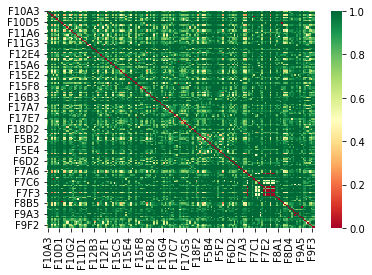

In [12]:
# make a heat map of Jaccard index
# heat map lib
import seaborn as sns 
# convert all columns to float cause the first column wasnt
tmpdf = act4_jaccard_index.astype('float')
# actual plot
sns.heatmap(tmpdf, cmap ='RdYlGn')
# delete temp variable
del tmpdf

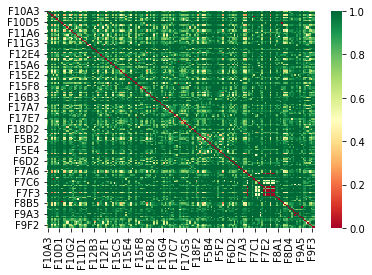

In [13]:
# make a heat map of Jdist
# convert all columns to float cause the first column wasnt
tmpdf = act5_Jdist_df.astype('float')
# actually plot
sns.heatmap(tmpdf, cmap ='RdYlGn')
# delete the tmp var
del tmpdf 

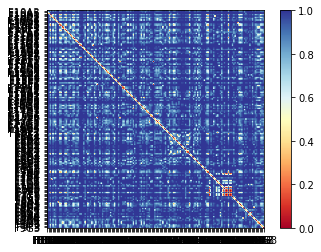

In [14]:
# other heat map lib
import matplotlib.pyplot as plt
plt.imshow(act4_jaccard_index.iloc[:, 1:163], cmap ="RdYlBu")
  
# Displaying a color bar to understand
# which color represents which range of data
plt.colorbar()
  
# Assigning labels of x-axis 
# according to dataframe
plt.xticks(range(len(act4_jaccard_index)), act4_jaccard_index.columns)
  
# Assigning labels of y-axis 
# according to dataframe
plt.yticks(range(len(act4_jaccard_index)), act4_jaccard_index.index)
  
# Displaying the figure
plt.show()

In [644]:
################################################################
# This is making a normalized jaccard matrix, its not needed but a backup of how i did it
################################################################
def something():
    # make a dataframe
    tmpdf = df.iloc[:163, :163]
    tmpdf.columns = new_act3_df.iloc[:,3:].columns.values
    tmpdf.index = new_act3_df.iloc[:,3:].columns.values

    # m11 = represents the total number of attributes where A and B both have a value of 1.
    # m01 = represents the total number of attributes where the attribute of A is 0 and the attribute of B is 1
    # m10 = represents the total number of attributes where the attribute of A is 1 and the attribute of B is 0.
    # m00 = represents the total number of attributes where A and B both have a value of 0.
    # j = m11 / (m01 + m10 + m11)
    for i in range(0, 163):
        for j in range(0, 163):
            m11, m01, m10 = float(0), float(0), float(0)
            for k in range(0, new_act3_df.shape[0]):
                if (new_act3_df.iloc[k, i+3] == 1) and (new_act3_df.iloc[k, j+3] == 1):
                    m11 += 1
                    m10 += 1
                    m01 += 1
                elif new_act3_df.iloc[k, j+3] == 1:
                    m01 += 1
                elif (new_act3_df.iloc[k, i+3] == 1):
                    m10 += 1
                # print(new_act3_df.iloc[k, i+3], " ", new_act3_df.iloc[k, j+3])
            # end of k
            tmpdf.iloc[i,j] = float(m11 / min(m10, m01))
        # end of j
    # end of i

    # note on this:
    # we do +3 on the m calculations so we dont get the first couple columns in the other matrix cause it has useless info

    # printout
    return tmpdf

In [821]:
############################################### Mon, Feb 1st Week 4, activity 6 #############################################################
#####################################################################################
################################# Step 1 ############################################
#####################################################################################
# Function Def:
# Description: randomly select k = 3 points to be the initial cluster
def get_points():
    tmparr = []
    p1, p2, p3 = random.sample(range(0, 163), 3)
    tmparr.append(p1)
    tmparr.append(p2)
    tmparr.append(p3)
    return tmparr
# end of get_points

#####################################################################################
################################# Step 2/3 ##########################################
#####################################################################################
# Function Def:
# reg_df = dataframe that we pull values from to make the norm jaccard index
# Description: Make the normalized jaccard similarity matrix (dataframe)
def make_norm_jaccard(reg_df):
    # make a dataframe
    tmpdf = df.iloc[:163, :163]
    tmpdf.columns = reg_df.columns.values
    tmpdf.index = reg_df.columns.values

    # m11 = represents the total number of attributes where A and B both have a value of 1.
    # m01 = represents the total number of attributes where the attribute of B is 1
    # m10 = represents the total number of attributes where the attribute of A is 1
    # j = m11 / min(a,b)
    for i in range(0, reg_df.shape[1]):
        for j in range(0, reg_df.shape[1]):
            m11, m01, m10 = float(0), float(0), float(0)
            for k in range(0, reg_df.shape[0]):
                if (reg_df.iloc[k, i] == 1) and (reg_df.iloc[k, j] == 1):
                    m11 += 1
                    m10 += 1
                    m01 += 1
                elif reg_df.iloc[k, j] == 1:
                    m01 += 1
                elif reg_df.iloc[k, i] == 1:
                    m10 += 1
            # end of k
            tmpdf.iloc[i,j] = float(m11 / min(m10, m01))
        # end of j
    # end of i

    # return the df
    return tmpdf
# end of function

# Function Def:
# jacdf = norm jaccard df
# points = initial starting cluster points
# var_dict = norm jaccard values for the clusters
# Description: Measure the distance between the 3 initial points and other NP's then assign the NPs to the closest cluster. 
# We measure the distance by getting the smallest value in of the three rows that we are looking at 
def make_cluster(jacdf, points, dist_dict):
    # make the clusters
    c1, c2, c3 = [], [], []
    
    # var list of distances
    vc1, vc2, vc3 = [], [], []
    
    # put initial NP's in clusters
    c1.append(jacdf.columns[points[0]])
    c2.append(jacdf.columns[points[1]])
    c3.append(jacdf.columns[points[2]])
    
    # go through all columns and assign to a df, looking only at the rows from points. Min number = column goes to that row cluster
    for i in range(0, jacdf.shape[1]):
        if i not in points:
            if (min(jacdf.iloc[points[0], i], jacdf.iloc[points[1], i], jacdf.iloc[points[2], i]) == jacdf.iloc[points[0], i]):
                # goes in c1
                c1.append(jacdf.columns[i])
                vc1.append(jacdf.iloc[points[0], i])
            elif (min(jacdf.iloc[points[0], i], jacdf.iloc[points[1], i], jacdf.iloc[points[2], i]) == jacdf.iloc[points[1], i]):
                # goes in c2
                c2.append(jacdf.columns[i])
                vc2.append(jacdf.iloc[points[1], i])
            elif (min(jacdf.iloc[points[0], i], jacdf.iloc[points[1], i], jacdf.iloc[points[2], i]) == jacdf.iloc[points[2], i]):
                # goes in c3
                c3.append(jacdf.columns[i])
                vc3.append(jacdf.iloc[points[2], i])
        # end of if
    # end of for
    
    # append on var values
    dist_dict["c1"].append(vc1)
    dist_dict["c2"].append(vc2)
    dist_dict["c3"].append(vc3)
    
    # return clusters
    return c1, c2, c3
# end of function

#####################################################################################
################################# Step 4 ############################################
#####################################################################################
# find the center (medoid) of each cluster
# Function Def:
# Description: we take the mean of the normalized jaccard similarity values and then get the column (NP) that is closest to it
def get_medoid(dist_dict, cluster, cluster_name):
    # calculate mean
    mean = sum(dist_dict[cluster_name][len(dist_dict[cluster_name]) - 1]) / (len(dist_dict[cluster_name][len(dist_dict[cluster_name]) - 1]))
    
    # get the distance thats closest to that number
    # pulled from: https://www.kite.com/python/answers/how-to-find-the-nearest-value-in-a-list-to-a-given-one-in-python#:~:text=Use%20min()%20to%20find,value%20to%20the%20given%20value.
    absolute_difference_function = lambda list_value : abs(list_value - mean)
    closest_value = min(dist_dict[cluster_name][len(dist_dict[cluster_name]) - 1], key=absolute_difference_function)
    
    pos = 0
    # get the NP that matches the distance
    for i in range(0, len(dist_dict[cluster_name][len(dist_dict[cluster_name]) - 1])):
        if dist_dict[cluster_name][len(dist_dict[cluster_name]) - 1][i] == closest_value:
            # return cluster[i]
            pos = i
    # end of for
    
    return cluster[pos]
# end of function

def get_medoid2(cluster, mdf):
    # make a df
    tmpdf = df.iloc[:len(cluster), :len(cluster)]
    tmpdf.columns = cluster
    tmpdf.index = cluster
    
    # fill the df with normalized jaccard similarity values
    for i in range(0, len(cluster)):
        for j in range(0, len(cluster)):
            m11, m01, m10 = float(0), float(0), float(0)
            for k in range(0, mdf.shape[0]):
                if (mdf.loc[k, cluster[i]] == 1) and(mdf.loc[k, cluster[j]] == 1):
                    m11 += 1
                    m10 += 1
                    m01 += 1
                elif (mdf.loc[k, cluster[i]] == 0) and(mdf.loc[k, cluster[j]] == 1):
                    m01 += 1
                elif (mdf.loc[k, cluster[i]] == 1) and(mdf.loc[k, cluster[j]] == 0):
                    m10 += 1
            # end of k
            tmpdf.iloc[i, j] = float(m11 / min(m10, m01))
        # end of j
    # end of i
    # return the NP (the position of the smallest number in the column sums) which is the medoid
    return cluster[tmpdf.sum().argmin()]
# end of function

#####################################################################################
################################# Step 5 ############################################
#####################################################################################
# Function Def:
# name = what key to check lists
# cluster = list of NP's
# cluster_dict = dictionary of the clusters
# Description: check if a list is already in the dictionary
def check_dict(name, cluster, cluster_dict):
    for clist in cluster_dict[name]:
        if (cluster == clist) == True:
            return True
# end of function

#####################################################################################
################################# Step 6 ############################################
#####################################################################################
# Function Def:
# dist_dict = distance values from the clusters
# Description: Assess the quality of the clustering by adding up the variation within the clusters
# we do this by adding up the total distances 
def variation(dist_dict):
    # make a dictionary for the variation of each cluster
    var_dict = {"c1":[], "c2":[], "c3":[]}
    
    # add up the distances 
    for list in dist_dict["c1"]:
        sum = 0
        for num in list:
            sum += num
        # end of num
        var_dict["c1"].append(sum)
    # end of list
    for list in dist_dict["c2"]:
        sum = 0
        for num in list:
            sum += num
        # end of num
        var_dict["c2"].append(sum)
    # end of list
    for list in dist_dict["c3"]:
        sum = 0
        for num in list:
            sum += num
        # end of num
        var_dict["c3"].append(sum)
    # end of list
    
    # return the dict
    return var_dict
# end of function

#####################################################################################
################################# Driver ############################################
#####################################################################################
# driver function for the other functions, building up all the pieces
# tmpdf = df to get column locations 
def driver(tmpdf):
    # make a dictionary for the 3 clusters - keep track of the various clusters
    cluster_dict = {"c1":[], "c2":[], "c3":[]}
    
    # make a dictionary for the medoid of each cluster - keep track of the various medoids
    medoid_dict = {"c1":[], "c2":[], "c3":[]}
    
    # make a dictionary for the distance of each NP in the Cluster - for the variation step later
    dist_dict = {"c1":[], "c2":[], "c3":[]}
    
    # flag for when to stop the loop
    loopFlag = False
    
    # get initial random points
    points = get_points()
    
    while(loopFlag == False):
        # get the clustering
        c1, c2, c3 = make_cluster(tmpdf, points, dist_dict)
        
        # print(len(c1),len(c2),len(c3))
        
        # check to see that c1 and c2 are not repeated (the list isnt already in a dict)
        check_c1 = check_dict("c1", c1, cluster_dict)
        check_c2 = check_dict("c2", c2, cluster_dict)
        check_c3 = check_dict("c3", c3, cluster_dict)
        
        if check_c1 == True and check_c2 == True and check_c3 == True:
            loopFlag = True
        else:
            # get the medoid of each cluster
            # c1_medoid = get_medoid(dist_dict, c1, "c1")
            # c2_medoid = get_medoid(dist_dict, c2, "c2")
            # c3_medoid = get_medoid(dist_dict, c3, "c3")
            
            # get medoid method 2
            c1_medoid = get_medoid2(c1, new_act3_df.iloc[:, 3:])
            c2_medoid = get_medoid2(c2, new_act3_df.iloc[:, 3:])
            c3_medoid = get_medoid2(c3, new_act3_df.iloc[:, 3:])
            
            # place everything into their respective dictionaries
            # c1
            cluster_dict["c1"].append(c1)
            medoid_dict["c1"].append(c1_medoid)
            # c2
            cluster_dict["c2"].append(c2)
            medoid_dict["c2"].append(c2_medoid)
            # c3
            cluster_dict["c3"].append(c3)
            medoid_dict["c3"].append(c3_medoid)
        # end of else
        
        # update the points with the medoids we just got as the inits
        points = [tmpdf.columns.get_loc(c1_medoid), tmpdf.columns.get_loc(c2_medoid), tmpdf.columns.get_loc(c3_medoid)]
    # end of while  
    
    # calculate the variation
    var_dict = variation(dist_dict)
    
    return cluster_dict, medoid_dict, dist_dict, var_dict
# end of function

#####################################################################################
############################# Start the Code ########################################
cluster_dict, medoid_dict, dist_dict, var_dict = driver(normjaccarddf)
#####################################################################################

In [682]:
normjaccarddf = make_norm_jaccard(new_act3_df.iloc[:, 3:])

In [57]:
# Note:
# - present 11am tuesday

In [822]:
medoid_dict

{'c1': ['F10A5', 'F7D4', 'F15F3', 'F15B5', 'F15F3', 'F15B5', 'F15F3'],
 'c2': ['F18C4', 'F6G3', 'F9A5', 'F15E4', 'F18E2', 'F6C4', 'F18E2'],
 'c3': ['F3F1', 'F12B2', 'F15E7', 'F12B2', 'F7D4', 'F12B2', 'F7D4']}

In [781]:
cluster_dict["c2"]

[['F10A3',
  'F10A5',
  'F10C1',
  'F10C4',
  'F10D1',
  'F10F3',
  'F10F5',
  'F11A3',
  'F11A6',
  'F11B1',
  'F11B2',
  'F11B5',
  'F11D1',
  'F11D2',
  'F11D4',
  'F11G3',
  'F11G4',
  'F12B1',
  'F12B2',
  'F12B3',
  'F12C6',
  'F12D4',
  'F12E4',
  'F12E5',
  'F12E6',
  'F12F1',
  'F12G1',
  'F15A3',
  'F15A5',
  'F15B5',
  'F15C5',
  'F15C8',
  'F15E1',
  'F15E2',
  'F15E4',
  'F15E5',
  'F15F1',
  'F15F5',
  'F15F8',
  'F15H1',
  'F15H5',
  'F16A4',
  'F16B1',
  'F16B3',
  'F16B6',
  'F16C1',
  'F16D6',
  'F16F4',
  'F16G4',
  'F16G6',
  'F17A7',
  'F17B1',
  'F17B7',
  'F17C7',
  'F17D6',
  'F17E6',
  'F17E7',
  'F17G3',
  'F18B2',
  'F18B4',
  'F18C4',
  'F18D2',
  'F18E1',
  'F18E2',
  'F18F2',
  'F5A2',
  'F5A4',
  'F5B3',
  'F5B4',
  'F5C1',
  'F5C2',
  'F5C4',
  'F5E4',
  'F5F2',
  'F5G2',
  'F6B2',
  'F6B4',
  'F6C2',
  'F6D2',
  'F6E4',
  'F6F4',
  'F6G3',
  'F7B4',
  'F7B5',
  'F7B6',
  'F7C1',
  'F7C2',
  'F7C6',
  'F7D2',
  'F7D3',
  'F7D4',
  'F7E2',
  'F7G5',
  'F8

In [532]:
cluster_dict["c2"]

[['F10A5',
  'F10B3',
  'F10C1',
  'F10D5',
  'F10E3',
  'F12B1',
  'F12B2',
  'F12D4',
  'F12F1',
  'F15A3',
  'F15B5',
  'F15F1',
  'F15F3',
  'F15F6',
  'F16F4',
  'F16G3',
  'F17E7',
  'F5C4',
  'F5E2',
  'F6B2',
  'F6G2',
  'F7B2',
  'F7C1',
  'F7D6',
  'F7E6',
  'F7F2',
  'F7F6',
  'F7G2',
  'F8B4',
  'F9A2',
  'F9A4',
  'F9B4',
  'F8D4'],
 ['F10B3',
  'F10C1',
  'F10D5',
  'F10E3',
  'F12B1',
  'F12B2',
  'F12D4',
  'F12F1',
  'F15A3',
  'F15B5',
  'F15F1',
  'F15F3',
  'F15F6',
  'F16F4',
  'F16G3',
  'F17E7',
  'F5C4',
  'F5E2',
  'F6B2',
  'F6G2',
  'F7B2',
  'F7C1',
  'F7D6',
  'F7E6',
  'F7F2',
  'F7F6',
  'F7G2',
  'F8B4',
  'F8D4',
  'F9A2',
  'F9A4',
  'F9B4',
  'F10A5'],
 ['F10A5',
  'F10C1',
  'F10D5',
  'F10E3',
  'F12B1',
  'F12B2',
  'F12D4',
  'F12F1',
  'F15A3',
  'F15B5',
  'F15F1',
  'F15F3',
  'F15F6',
  'F16F4',
  'F16G3',
  'F17E7',
  'F5C4',
  'F5E2',
  'F6B2',
  'F6G2',
  'F7B2',
  'F7C1',
  'F7D6',
  'F7E6',
  'F7F2',
  'F7F6',
  'F7G2',
  'F8B4',
  'F8D4'